In [53]:
import os
import pandas as pd
from gmpy2 import mpz
import numpy
from random import random

pd.options.mode.chained_assignment = None  # default='warn'

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Plot pool balances after swap

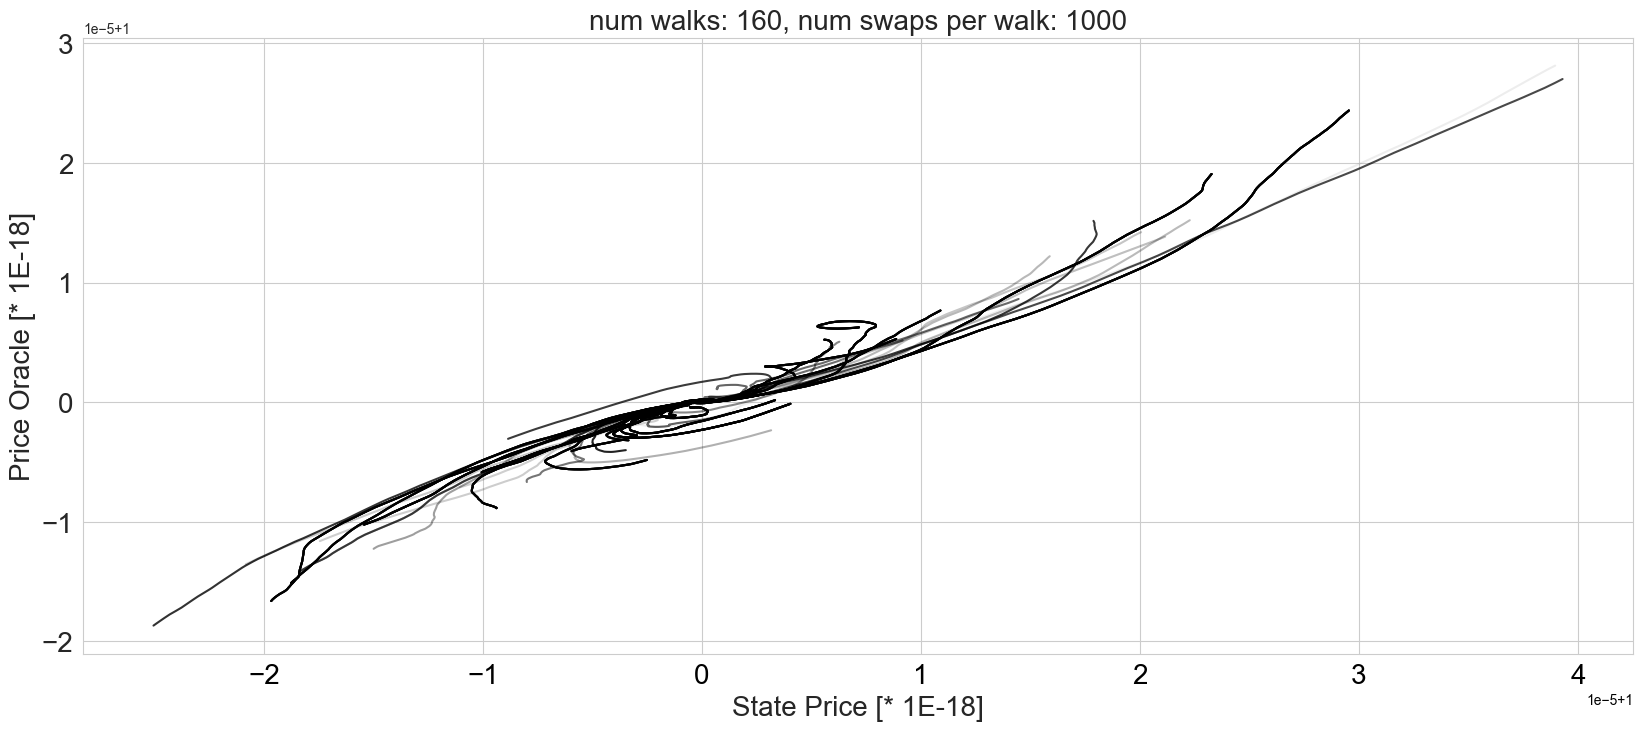

In [55]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.set_xlabel("State Price [* 1E-18]", fontsize=20)
ax.set_ylabel("Price Oracle [* 1E-18]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');

c = 0
for i, data_file in enumerate(os.listdir("../data")):
    
    if data_file.startswith("random_swamps_"):
        
        c += 1
        data = pd.read_csv(f"../data/{data_file}", index_col=0)
        
        for col in ["p", "virtual_price", "price_oracle"]:
            data.loc[:, col] = data.loc[:, col].astype(float) * 1e-18
            
        ax.plot(
            data.p,
            data.price_oracle,
            # color=numpy.random.rand(3,),
            color="black",
            alpha=random()
        );
        
ax.set_title(f"num walks: {c}, num swaps per walk: 1000", fontsize=20);


Analyse individual random walks

In [3]:
def plot_prices(n: int):
    filename = f"random_swamps_{n}.csv"
    data = pd.read_csv(f"../data/{filename}", index_col=0)

    fig, ax = plt.subplots(1,1, figsize=(20, 8))

    to_plot = data[["block_timestamp", "p", "virtual_price", "price_oracle"]]
    for col in ["p", "virtual_price", "price_oracle"]:
        to_plot.loc[:, col] = to_plot.loc[:, col].astype(float) * 1e-18
    to_plot.block_timestamp = to_plot.block_timestamp.diff().fillna(0).cumsum() / 60 / 60

    ax.plot(
        to_plot.block_timestamp,
        to_plot.price_oracle,
        color="green",
        label="price_oracle"
    )

    ax.plot(
        to_plot.block_timestamp,
        to_plot.virtual_price,
        color="blue",
        label="virtual_price"
    )

    ax.plot(
        to_plot.block_timestamp,
        to_plot.p,
        color="red",
        label="p"
    )

    ax.set_xlabel("hours", fontsize=20)
    ax.set_ylabel("Price Units [* 1E-18]", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', colors='black');
    ax.legend(fontsize=20)

    ax.set_title(f"{filename}", fontsize=20);
    
    return data

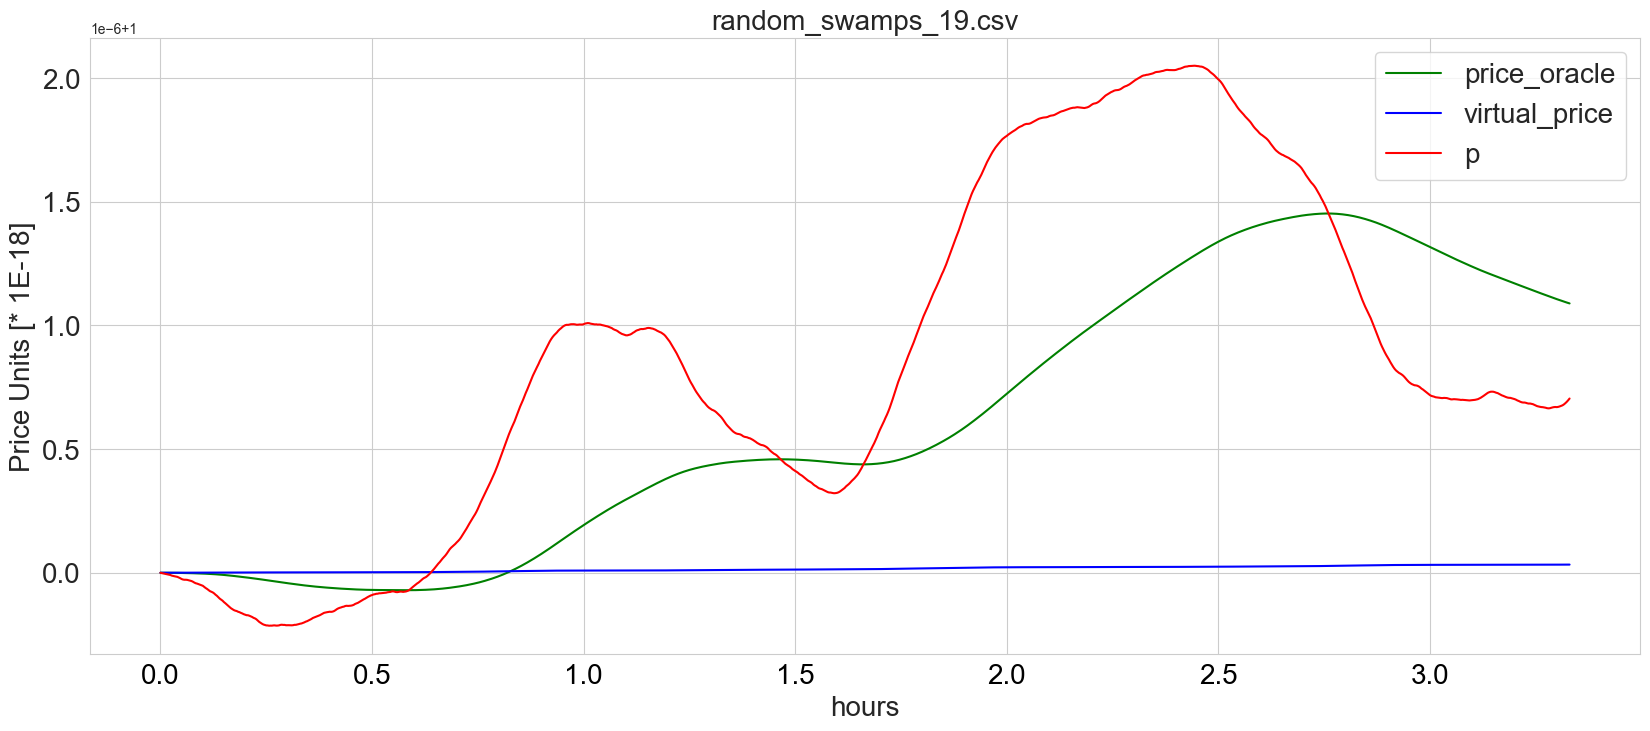

In [22]:
data = plot_prices(19)

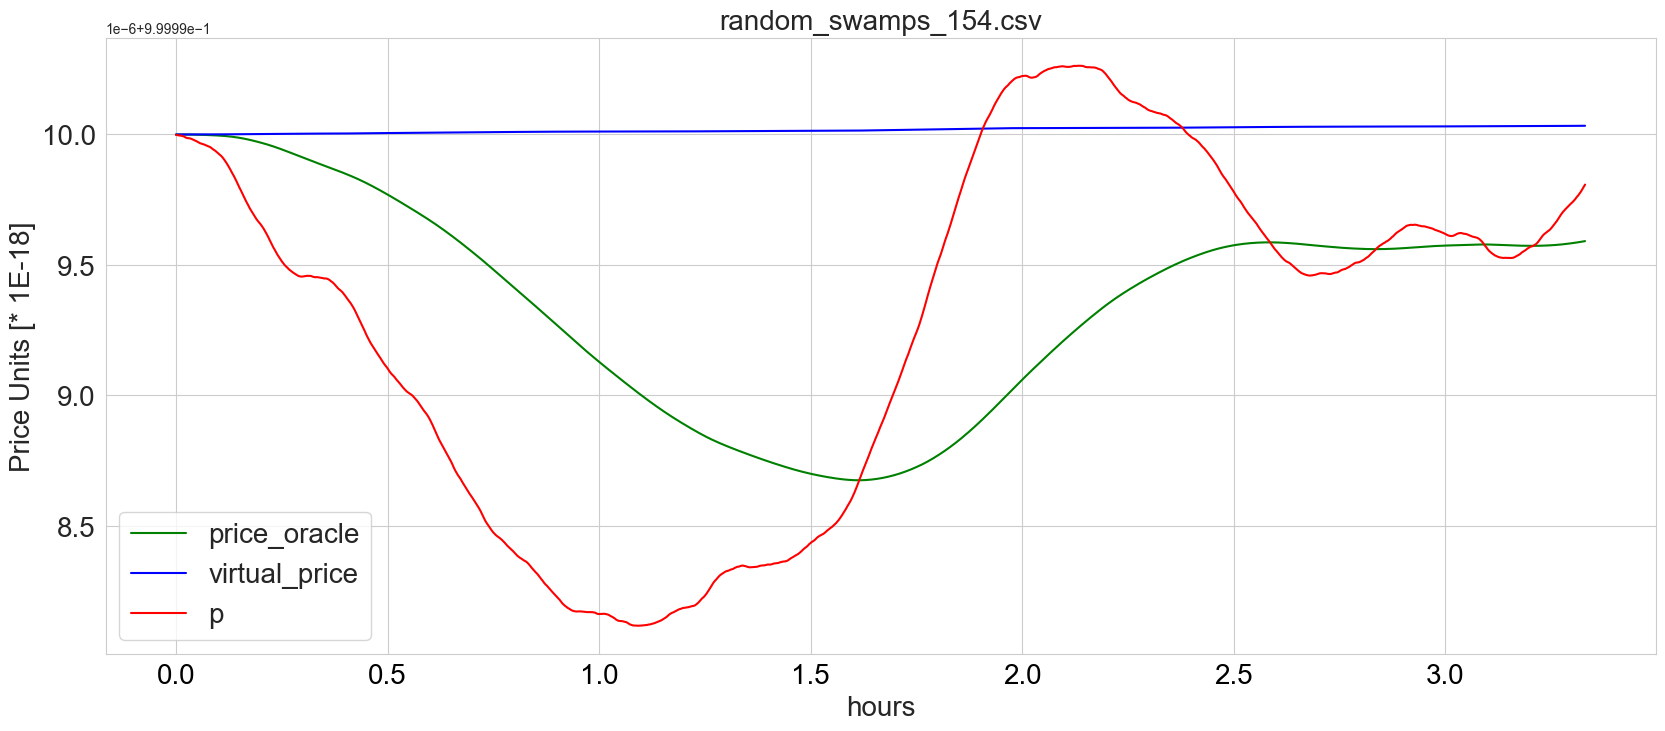

In [57]:
data = plot_prices(154)

Looks like it behaves as expected ... the matplotlib axes are weird af though...